In [1]:
import habitat

import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Habitat-API
# All the boilerplate code in the habitat-sim to set sensor config 
# and agent config is abstracted out in the Habitat-API config system.
# Default config is at habitat/config/default.py. 
# You can override defaults by specifying them in a separate file and pass it to the get_config function
# or defrost the config object, override parameters and freeze the config

config = habitat.get_config(config_paths='my_challenge_objectnav2020.local.rgbd.yaml')
env = habitat.Env(config=config)

2020-07-26 21:45:24,835 Initializing dataset ObjectNav-v1
Initializing dataset ObjectNav-v1
2020-07-26 21:45:24,894 initializing sim Sim-v0
initializing sim Sim-v0
2020-07-26 21:45:36,438 Initializing task ObjectNav-v1
Initializing task ObjectNav-v1


# Scene semantic annotations

In [3]:
def print_scene_recur(scene, limit_output=10):
    count = 0
    for level in scene.levels:
        print(
            f"Level id:{level.id}, center:{level.aabb.center},"
            f" dims:{level.aabb.sizes}"
        )
        for region in level.regions:
            print(
                f"Region id:{region.id}, category:{region.category.name()},"
                f" center:{region.aabb.center}, dims:{region.aabb.sizes}"
            )
            for obj in region.objects:
                print(
                    f"Object id:{obj.id}, category:{obj.category.name()},"
                    f" center:{obj.aabb.center}, dims:{obj.aabb.sizes}"
                )
                count += 1
                if count >= limit_output:
                    return None

# Print semantic annotation information (id, category, bounding box details) 
# for the current scene in a hierarchical fashion
scene = env.sim.semantic_annotations()
print_scene_recur(scene, limit_output=15)
    
env.close() 
# Note: Since only one OpenGL is allowed per process, 
# you have to close the current env before instantiating a new one.

Level id:0, center:[-4.11906     4.9516306  -0.29337978], dims:[ 21.60188   10.138741 -19.30162 ]
Region id:0_0, category:stairs, center:[-10.141615    3.584855   -5.0090947], dims:[ 4.4499702  5.2541084 -1.2099895]
Object id:0_0_0, category:wall, center:[-9.51795    2.8485303 -4.47102  ], dims:[0.19786453 3.5172997  3.25554   ]
Object id:0_0_1, category:misc, center:[-9.23384    2.9365597 -4.998    ], dims:[1.2387829 3.9577599 2.78506  ]
Object id:0_0_2, category:wall, center:[-9.57503  3.04151 -5.60862], dims:[0.09570312 3.7713     3.1055994 ]
Object id:0_0_3, category:stairs, center:[-9.43362    2.1609497 -5.07251  ], dims:[3.1736202 1.1535459 2.0464   ]
Object id:0_0_7, category:objects, center:[-7.97426    1.0960503 -5.00463  ], dims:[0.27821445 0.28493214 1.2391338 ]
Region id:0_1, category:entryway/foyer/lobby, center:[-6.80229    2.1822953 -3.5518847], dims:[ 2.7587204  2.4866505 -4.123909 ]
Object id:0_1_4, category:door, center:[-5.51366  2.04391 -1.94597], dims:[0.85734653 2

# Take random actions and display sensor data

In [4]:
from PIL import Image
from habitat_sim.utils.common import d3_40_colors_rgb
import numpy as np

def display_sample(rgb_obs, semantic_obs, depth_obs):
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    
    semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
    semantic_img.putpalette(d3_40_colors_rgb.flatten())
    semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
    semantic_img = semantic_img.convert("RGBA")
    
    depth_img = Image.fromarray((depth_obs * 255).astype(np.uint8), mode="L")

    arr = [rgb_img, semantic_img, depth_img]
    
    titles = ['rgb', 'semantic', 'depth']
    plt.figure(figsize=(12 ,8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i+1)
        ax.axis('off')
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show()

2020-07-26 21:45:36,575 Initializing dataset ObjectNav-v1
Initializing dataset ObjectNav-v1
2020-07-26 21:45:36,697 initializing sim Sim-v0
initializing sim Sim-v0
2020-07-26 21:45:40,971 Initializing task ObjectNav-v1
Initializing task ObjectNav-v1


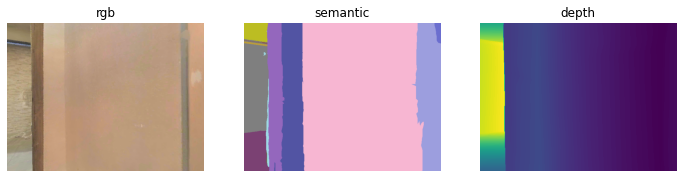

turn left


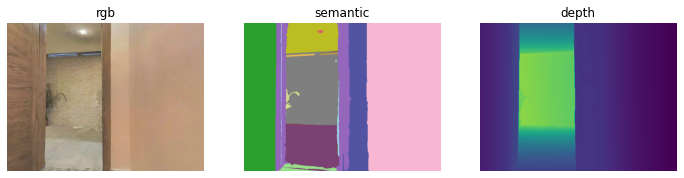

stop


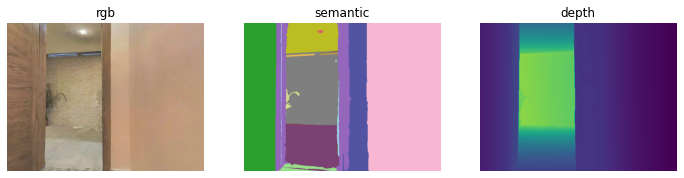

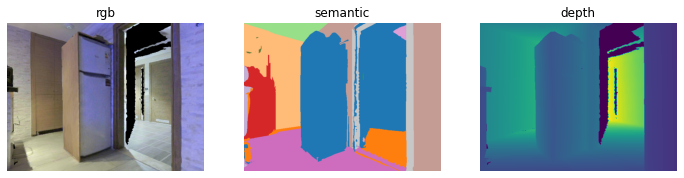

turn right


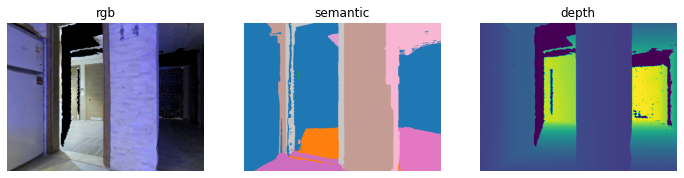

turn left


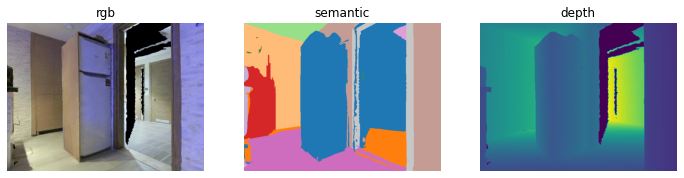

move_forward


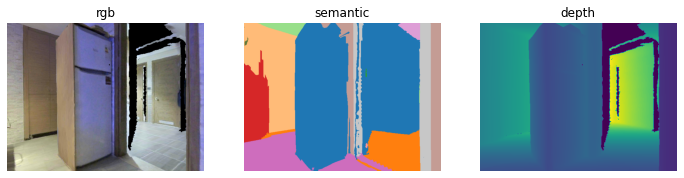

turn left


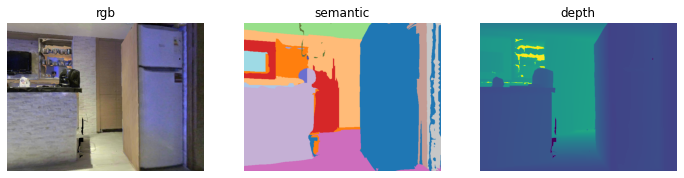

In [5]:
env = habitat.Env(config=config)
env.episodes = random.sample(env.episodes, 2)

max_steps = 4

action_mapping = {
    0: 'stop',
    1: 'move_forward',
    2: 'turn left',
    3: 'turn right'
}

for i in range(len(env.episodes)):
    observations = env.reset()
    
    display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))
    
    count_steps = 0
    while count_steps < max_steps:
        action = random.choice(list(action_mapping.keys()))
        print(action_mapping[action])
        observations = env.step(action)
        display_sample(observations['rgb'], observations['semantic'], np.squeeze(observations['depth']))

        count_steps += 1
        if env.episode_over:
            break
        
env.close()

In [6]:
observations

{'rgb': array([[[154, 146, 138],
         [154, 146, 138],
         [154, 146, 138],
         ...,
         [ 46,  46,  29],
         [ 46,  46,  29],
         [ 46,  46,  29]],
 
        [[154, 146, 138],
         [154, 146, 138],
         [154, 146, 138],
         ...,
         [ 46,  46,  29],
         [ 46,  46,  29],
         [ 46,  46,  29]],
 
        [[154, 146, 138],
         [154, 146, 138],
         [154, 146, 138],
         ...,
         [ 50,  42,  34],
         [ 46,  46,  29],
         [ 46,  46,  29]],
 
        ...,
 
        [[ 83,  83,  83],
         [ 83,  83,  83],
         [ 83,  83,  83],
         ...,
         [ 42,  34,  34],
         [ 47,  39,  41],
         [ 51,  43,  46]],
 
        [[ 85,  85,  85],
         [ 85,  85,  85],
         [ 85,  85,  85],
         ...,
         [ 48,  40,  39],
         [ 47,  39,  41],
         [ 51,  43,  46]],
 
        [[ 84,  84,  76],
         [ 84,  84,  76],
         [ 88,  88,  80],
         ...,
         [ 48,  40,  